## Numerical differentiation
The derivative is found from the function f(x) and the small value h.

$$
\frac{df(x)}{dx} = lim_{h \rightarrow 0}\frac{f(x+h) - f(x)}{h}
$$

For example, the derivative of $f(x) = x^2$ at $x=1$ is following ($h=0.1$).

In [2]:
x = 1
h = 0.1
((x+h)*(x+h)-x*x)/h

2.100000000000002

## Partial differentiation
In a NISQ parametric quantum circuit, many angles appear as variables.  
Partial differentiation allows us to obtain the derivatives related to a particular parameter.

$$
\frac{\partial f(x,y)}{\partial x}
$$

or

$$
\frac{\partial f(x,y)}{\partial y}
$$

## Gradient
Gradient is a vector formed by partial derivatives.

$$
(\frac{\partial f(x,y)}{\partial x},\frac{\partial f(x,y)}{\partial y})
$$

Since the derivative is zero at the minima, you can find such places by applying an update to all the partial derivatives using the slope.  
The e is the learning rate here.

$$
x = x -e*\frac{\partial f(x,y)}{\partial x}\\
y = y -e*\frac{\partial f(x,y)}{\partial y}
$$

Repeat this process.

## SGD
Stochastic Gradient Descent probabilistically selects samples to calculate gradients.  
Let's do VQE to find the minimum expected value of the measured value in a circuit using the RY gate.

In [3]:
!pip install -q blueqat

Let's check another simple circuit with X measurement.

3.1405264162928


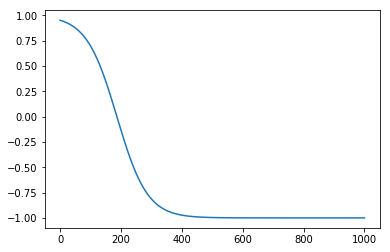

In [1]:
from blueqat import Circuit
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def abs_sq(k):
    return np.square(np.abs(k))

#Expectation value of Z
def exptZ(a):
    res = Circuit().ry(a)[0].run()
    return abs_sq(res[0])-abs_sq(res[1])

#Initial setting
ainit = [np.random.rand()*2*np.pi]
a = ainit.copy()
h = 0.001
e = 0.01

#Updating and recording gradients
for i in range(1000):
    a.append(a[i] - e*(exptZ(a[i]+h) - exptZ(a[i]))/h)

#Latest value
print(a[-1])

#Plot the expectation value
plt.plot(list(map(exptZ, a)))
plt.show()

The VQE was successfully completed.

## Loss fucntion
VQE needs to learn the variational principle and so on, so I'll use the loss function. This can be learned as machine learning.

3.372359211821972


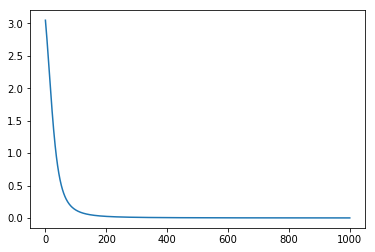

0.0007027084767734745


In [2]:
from blueqat import Circuit
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def abs_sq(k):
    return np.square(np.abs(k))

#Expectation value
def expt(a):
    res = Circuit().ry(a)[0].run()
    return abs_sq(res[0])-abs_sq(res[1])

#Loss function
def loss(res,tar):
    return np.square(res-tar)

#Derivative
def dfx(a,h,tgt=-1):
    return (loss(expt(a+h),tgt) - loss(expt(a),tgt))/h
#    return (expt(a+h)-expt(a))/h

#Gradient
def grad(a,h,e):
    for i in range(1000):
        a.append(a[i] - e*dfx(a[i],h))
    return a

#Initialization
a = [np.random.rand()*2*np.pi]
h = 0.001
e = 0.01

ra = grad(a,h,e)
print(ra[-1])

arr = [loss(expt(i),-1) for i in ra]

plt.plot(arr)
plt.show()

print(arr[-1])

## momentum SGD

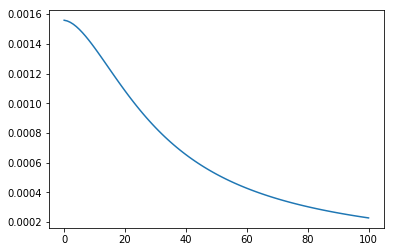

In [14]:
#momentum sgd
def msgd(a,h,e,tgt,alpha):
    p_delta = 0
    for i in range(100):
        update = -e*dfx(a[i],h,tgt) + alpha*p_delta
        a.append(a[i] + update)
        p_delta = update
    return a

#initialization
a = ainit.copy()
h = 0.001
e = 0.01

alpha = 0.9
tgt = -1

result = msgd(a,h,e,tgt,alpha)
arr = [loss(expt(i),tgt) for i in result]

plt.plot(arr)
plt.show()

## Adagrad

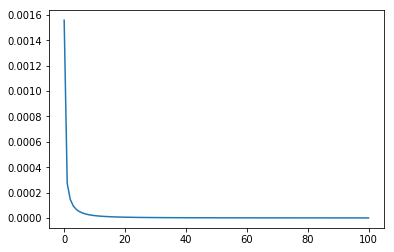

In [13]:
def adagrad(a,h,e,tgt,epsilon):
    G = epsilon
    for i in range(100):
        g = dfx(a[i],h,tgt)
        G += g*g
        update = -e/np.sqrt(G)*g
        a.append(a[i] + update)
    return a

#initialization
a = ainit.copy()
h = 0.001
e = 0.1
epsilon = 1e-08
tgt = -1

result = adagrad(a,h,e,tgt,epsilon)
arr = [loss(expt(i),tgt) for i in result]

plt.plot(arr)
plt.show()